# Cat-Boost

In [1]:
import pandas as pdNimport numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
CSV_FILE_NAME = 'processed.csv'
TARGET = 'BP'

In [3]:
df = pd.read_csv(CSV_FILE_NAME, low_memory=False)

In [4]:
POSITIONS = list(set(df[TARGET]))

In [5]:
positions_map = {}
for i,position in enumerate(POSITIONS):
    positions_map[position]=i

In [29]:
COLUMNS = [
    'Age', , 'Nationality', 'BOV', 'BP', 'POT', 'Height', 'Weight',
    'foot', 'Growth', 'Attacking', 'Crossing', 'Finishing',
    'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
    'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
    'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
    'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
    'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
    'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
    'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
    'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
    'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
    'DRI', 'DEF', 'PHY', 'Hits', 'Gender'
]

## Catboost-classifier

In [6]:
from catboost import CatBoostClassifier, Pool

In [27]:
columns_to_use = [
     # 'Height', 'Weight','Age',
    'OVA', 'POT',  'foot',  'Growth',
    
    'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 
    'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 
    'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
    'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
    'Mentality',# 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
    'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 
    #'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
    
    #'W/F',
    
    'PAC', 'SHO', 'PAS',  'DRI', 'DEF', 'PHY',  
    
    'Total Stats','Base Stats'
]

categoriacal_features = ['foot'] #['foot', 'W/F']

X = df[columns_to_use]
y = df[TARGET]

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

In [35]:
model = CatBoostClassifier(
    iterations=1500,
    depth=3,
    learning_rate=None, # autogenerated
    loss_function='MultiClass',
    verbose=True
)

train_pool = Pool(data=X_train, label=y_train, cat_features=categoriacal_features)
validation_pool = Pool(data=X_validation, cat_features=categoriacal_features)

# train the model
model.fit(train_pool, verbose=False)

# make the prediction using the resulting model
preds_class = model.predict(validation_pool, prediction_type="Class")

accuracy_score(preds_class, y_validation)

0.8065395095367848

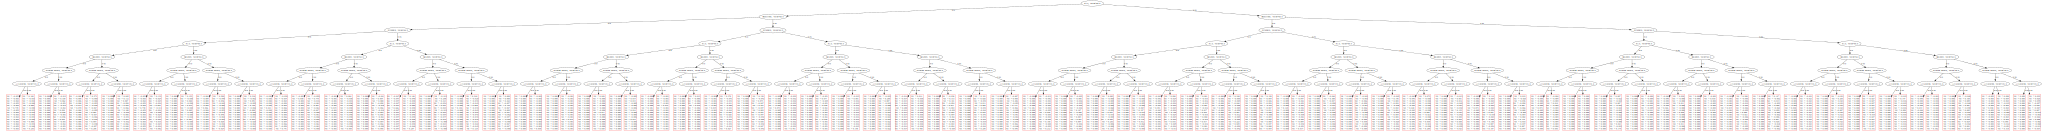

In [34]:

model.plot_tree(tree_idx=0, pool=train_pool)